In [25]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [26]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [27]:
df1 = pd.read_csv('C:/Users/user/TEST3/원본통합데이터/전국사고.csv',encoding='cp949')
df2 = pd.read_csv('C:/Users/user/TEST3/csv파일/빈도분석_노인보행.csv',encoding='cp949')

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872893 entries, 0 to 872892
Data columns (total 54 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    872893 non-null  int64 
 1   요일            872893 non-null  object
 2   주야            872893 non-null  object
 3   사고내용          872893 non-null  object
 4   사고유형_대분류      872893 non-null  object
 5   사고유형_중분류      872893 non-null  object
 6   사고유형          872893 non-null  object
 7   가해자성별         872893 non-null  object
 8   피해자성별         872893 non-null  object
 9   연령가해자         872893 non-null  object
 10  연령피해자         872893 non-null  object
 11  가해자음주_대분류     872893 non-null  object
 12  가해자음주         872893 non-null  object
 13  보호장구가해자_대분류   872893 non-null  object
 14  보호장구가해자       872893 non-null  object
 15  보호장구피해자_대분류   872893 non-null  object
 16  보호장구피해자       872893 non-null  object
 17  법규위반가해자       872893 non-null  object
 18  행동유형가해자_대분류   872893 non

In [29]:
len(df1)

872893

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54835 entries, 0 to 54834
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   발생시각          54835 non-null  object
 1   요일            54835 non-null  object
 2   주야            54835 non-null  object
 3   사고유형_대분류      54835 non-null  object
 4   가해자성별         54835 non-null  object
 5   피해자성별         54835 non-null  object
 6   연령가해자         54835 non-null  object
 7   연령피해자         54835 non-null  object
 8   가해자음주_대분류     54835 non-null  object
 9   법규위반가해자       54835 non-null  object
 10  행동유형가해자_대분류   54835 non-null  object
 11  행동유형가해자       54835 non-null  object
 12  신체상해정도피해자     54835 non-null  object
 13  가해자신체상해주부위    54835 non-null  object
 14  피해자신체상해주부위    54835 non-null  object
 15  당사자종별가해자_대분류  54835 non-null  object
 16  당사자종별피해자_대분류  54835 non-null  object
 17  도로종류          54835 non-null  object
 18  도로형태_대분류      54835 non-null  object
 19  노인보호

# 0. 사망자수/중상자수/경상자수/부상신고자수

In [31]:
# df1에서 사망자수,중상자수,경상자수,부상신고자수 퍼센트

a = (len(df1[df1['신체상해정도피해자']=='사망'])/len(df1))*100
b = (len(df1[df1['신체상해정도피해자']=='중상'])/len(df1))*100
c = (len(df1[df1['신체상해정도피해자']=='경상'])/len(df1))*100
d = (len(df1[df1['신체상해정도피해자']=='부상신고'])/len(df1))*100

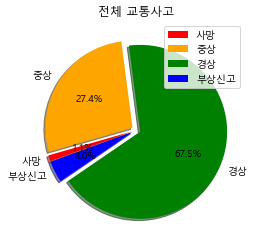

In [32]:
ratio = [a, b, c, d]
labels = ['사망', '중상', '경상', '부상신고']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['red', 'orange', 'green', 'blue']

plt.pie(ratio, labels=labels, autopct='%.1f%%',startangle=200, counterclock=False,explode=explode,shadow=True,colors=colors)
plt.title('전체 교통사고')
plt.legend(labels=labels, loc='upper right')
plt.show()

In [63]:
# df2에서 사망자수,중상자수,경상자수,부상신고자수 퍼센트

a = (len(df2[df2['신체상해정도피해자']=='사망'])/len(df2))*100
b = (len(df2[df2['신체상해정도피해자']=='중상'])/len(df2))*100
c = (len(df2[df2['신체상해정도피해자']=='경상'])/len(df2))*100
d = (len(df2[df2['신체상해정도피해자']=='부상신고'])/len(df2))*100

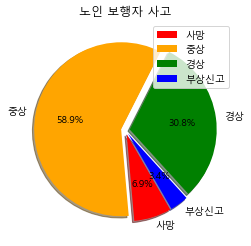

In [64]:
ratio = [a, b, c, d]
labels = ['사망', '중상', '경상', '부상신고']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['red', 'orange', 'green', 'blue']

plt.pie(ratio, labels=labels, autopct='%.1f%%',startangle=300, counterclock=False,explode=explode,shadow=True,colors=colors)
plt.title('노인 보행자 사고')
plt.legend(labels=labels, loc='upper right')
plt.show()

# 1. 발생시각

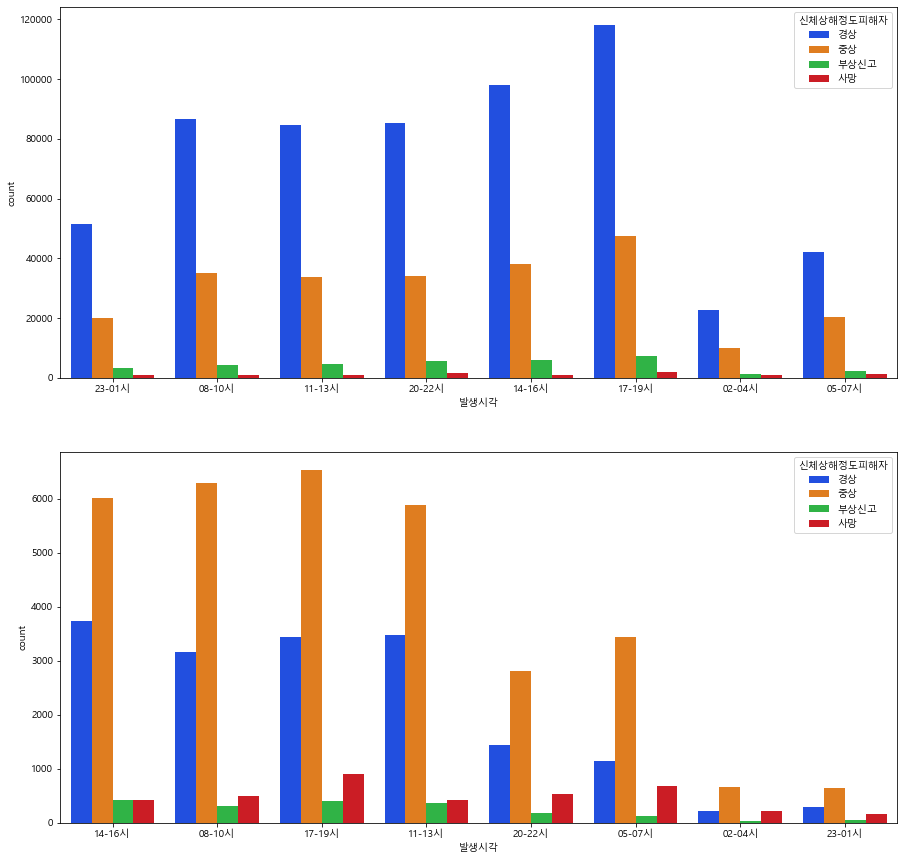

In [35]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="발생시각",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="발생시각", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 2.요일

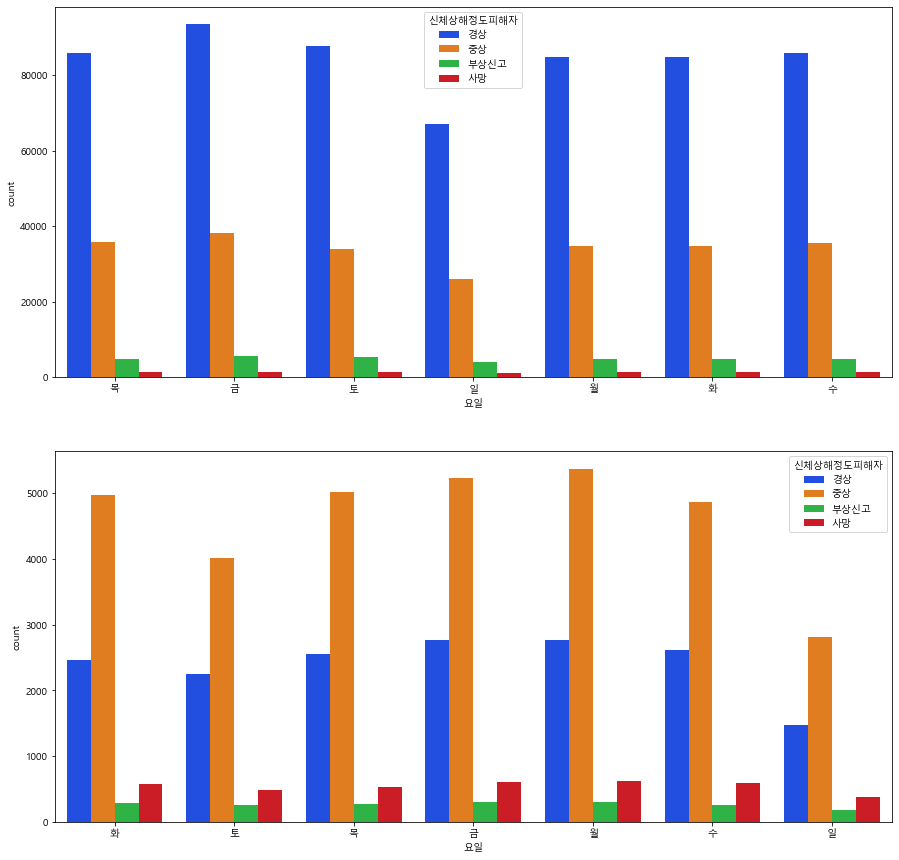

In [36]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="요일",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="요일", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 3.주야

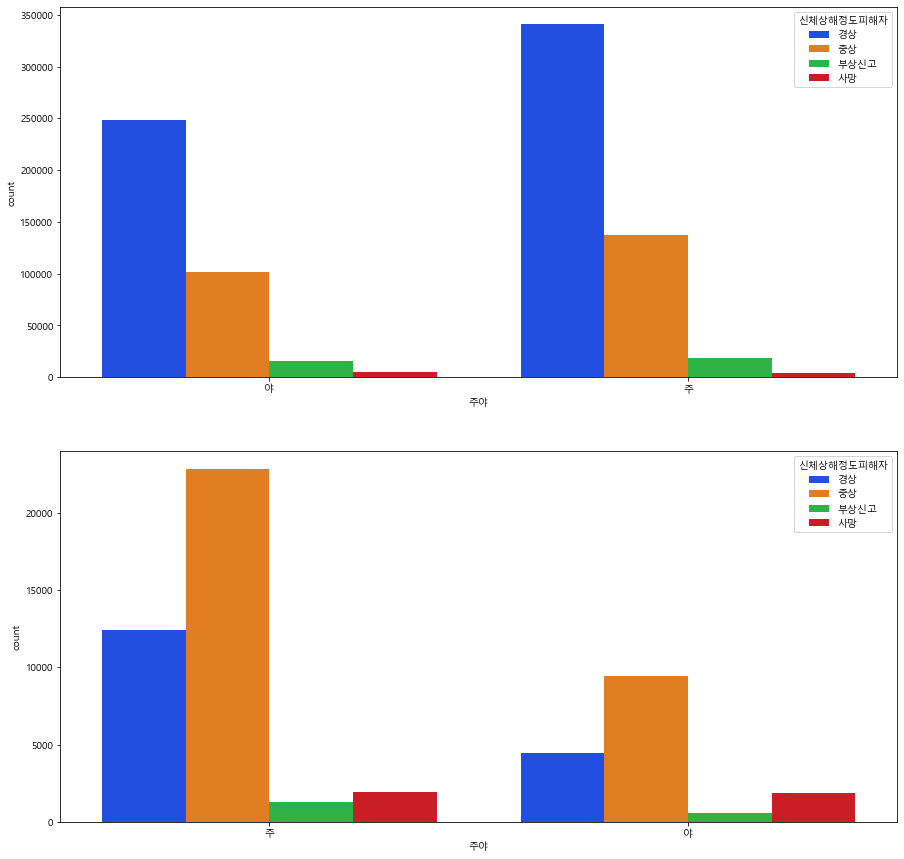

In [37]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="주야",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="주야", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 4.사고유형_대분류

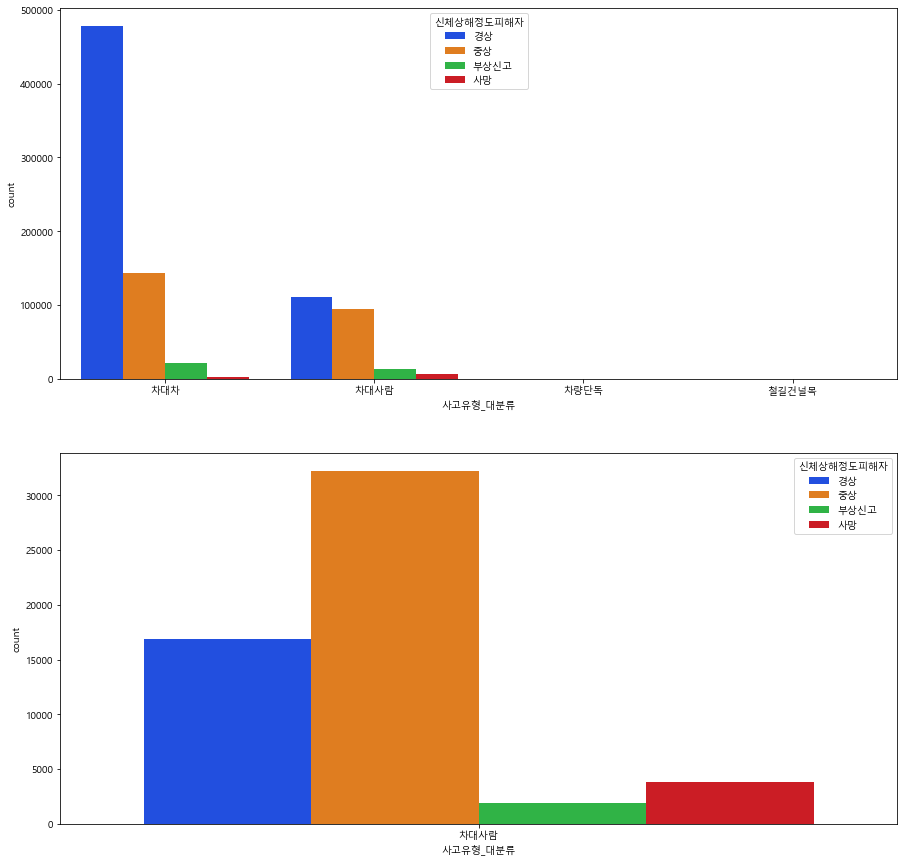

In [38]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="사고유형_대분류",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="사고유형_대분류", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 5. 가해자성별

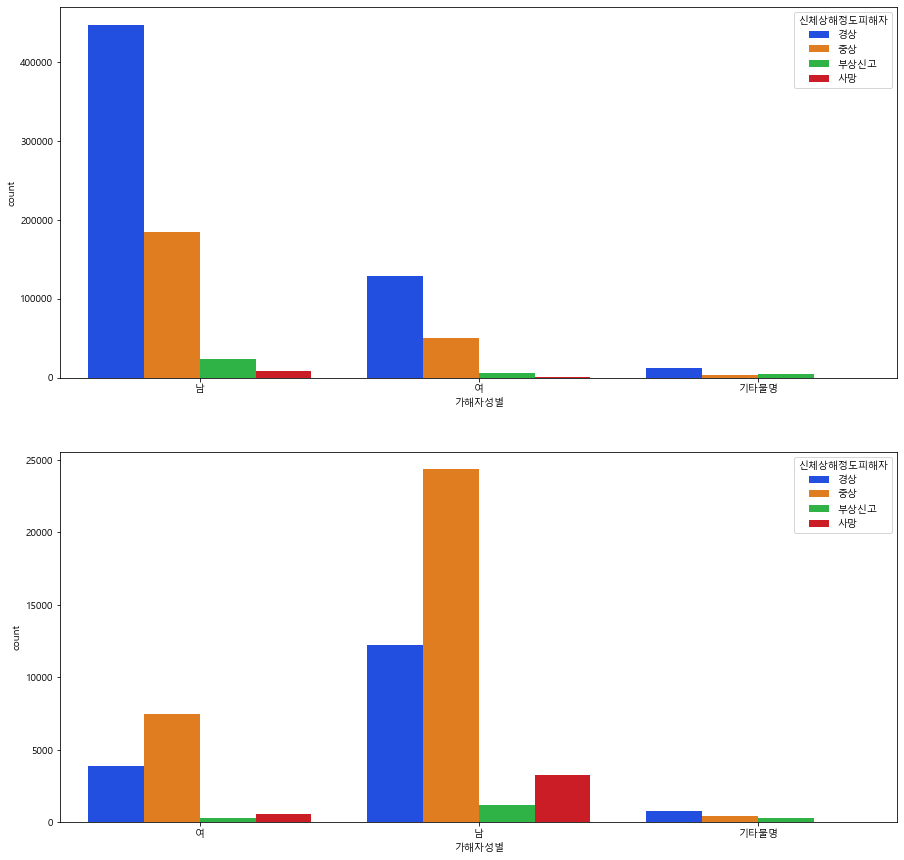

In [39]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="가해자성별",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="가해자성별", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 6.피해자성별

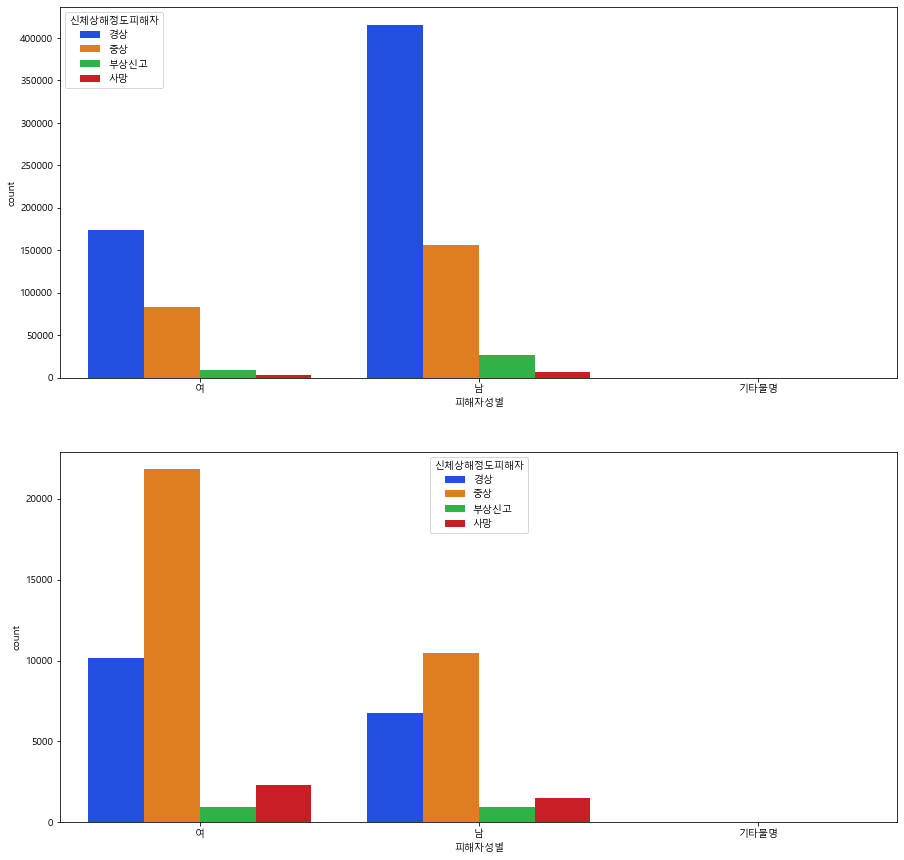

In [40]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="피해자성별",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="피해자성별", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 7. 연령가해자

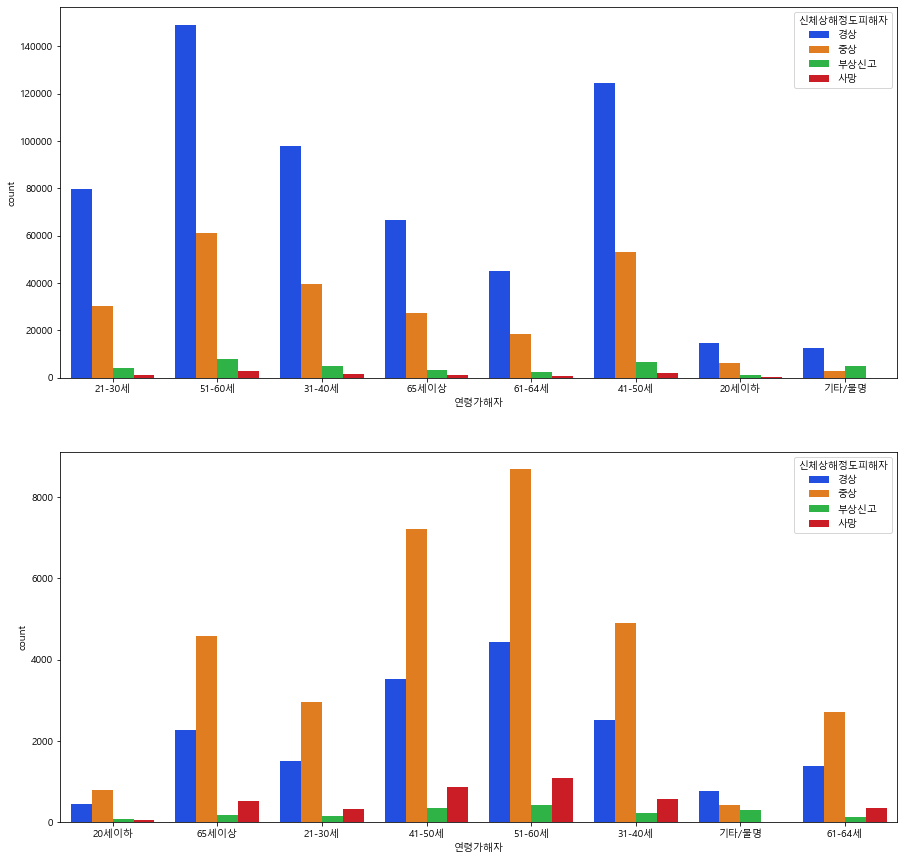

In [41]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="연령가해자",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="연령가해자", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 8.연령피해자

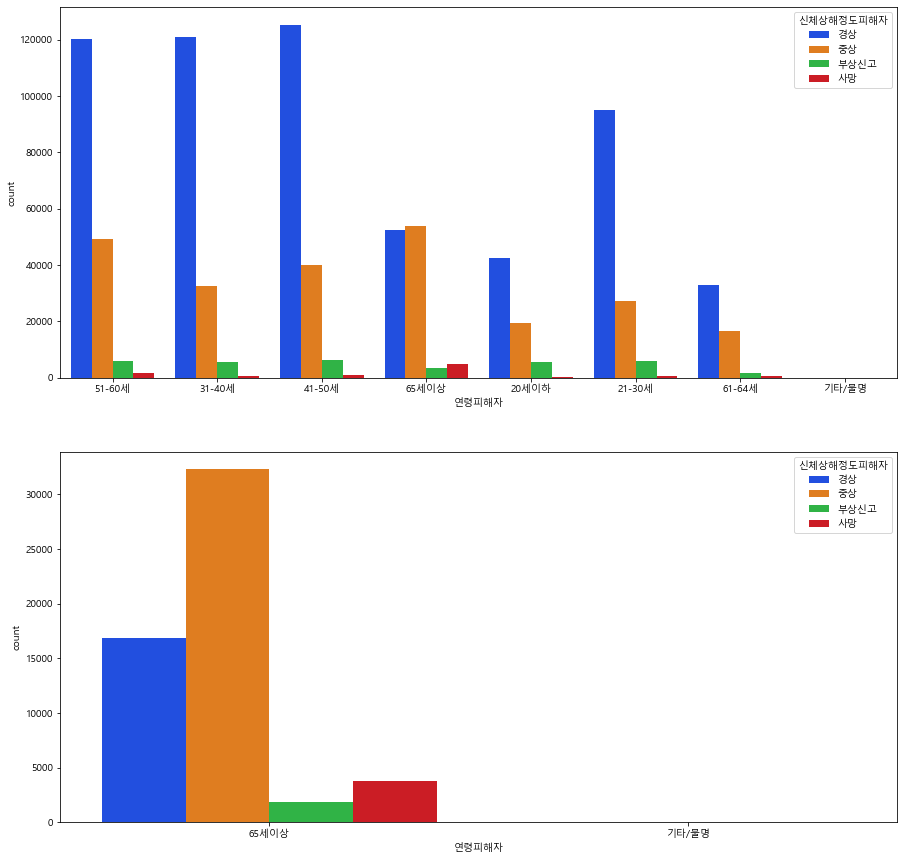

In [42]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="연령피해자",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="연령피해자", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 9. 가해자음주_대분류

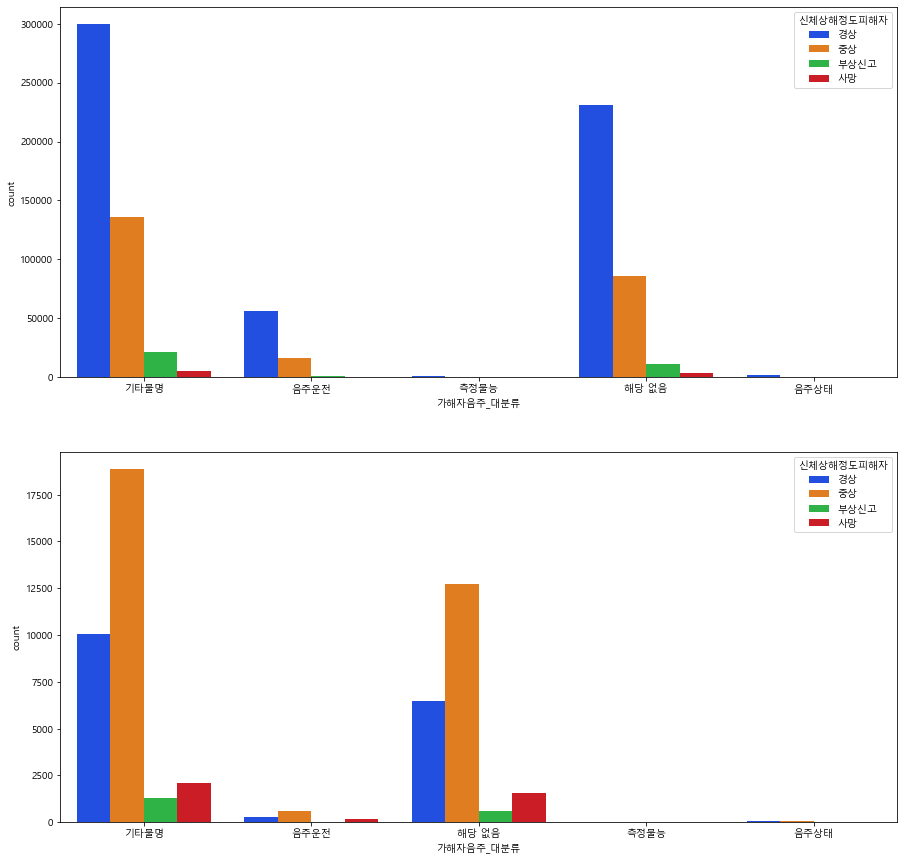

In [43]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="가해자음주_대분류",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="가해자음주_대분류", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 10. 법규위반가해자

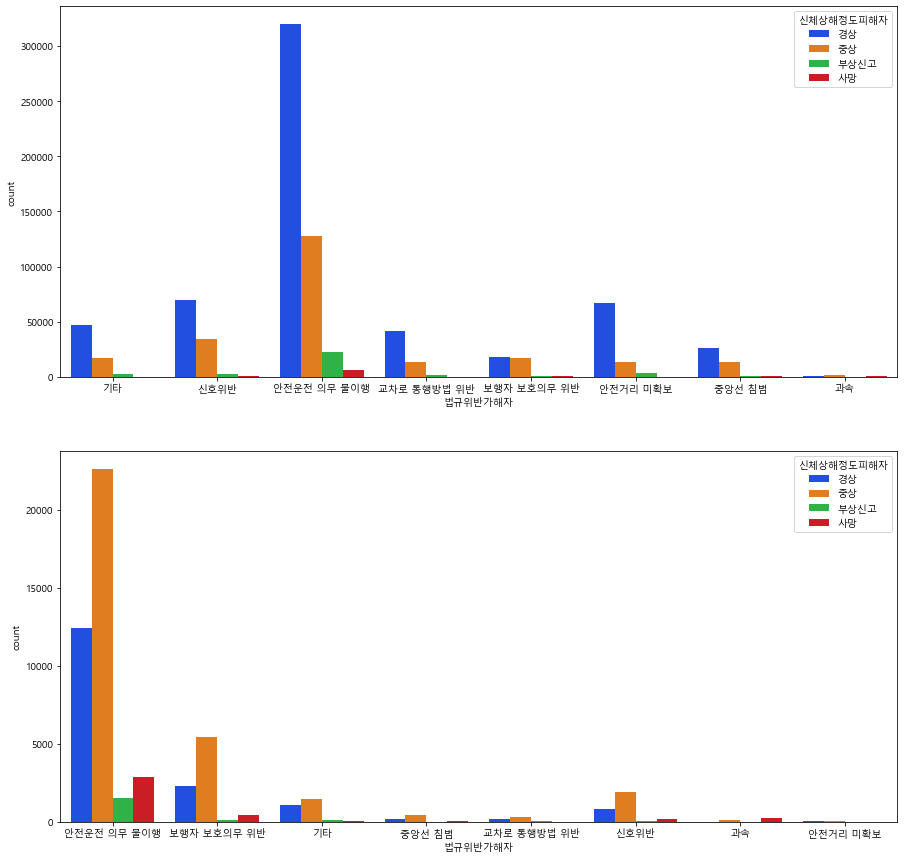

In [44]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="법규위반가해자",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="법규위반가해자", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 11. 행동유형가해자_대분류

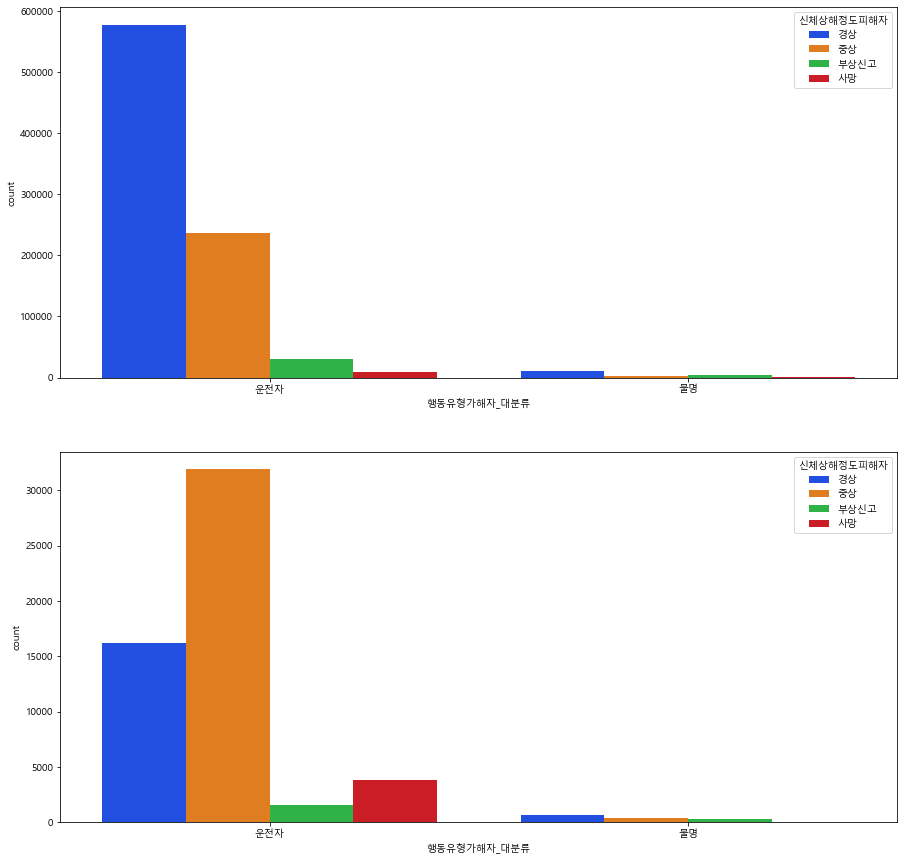

In [45]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="행동유형가해자_대분류",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="행동유형가해자_대분류", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 12.행동유형가해자

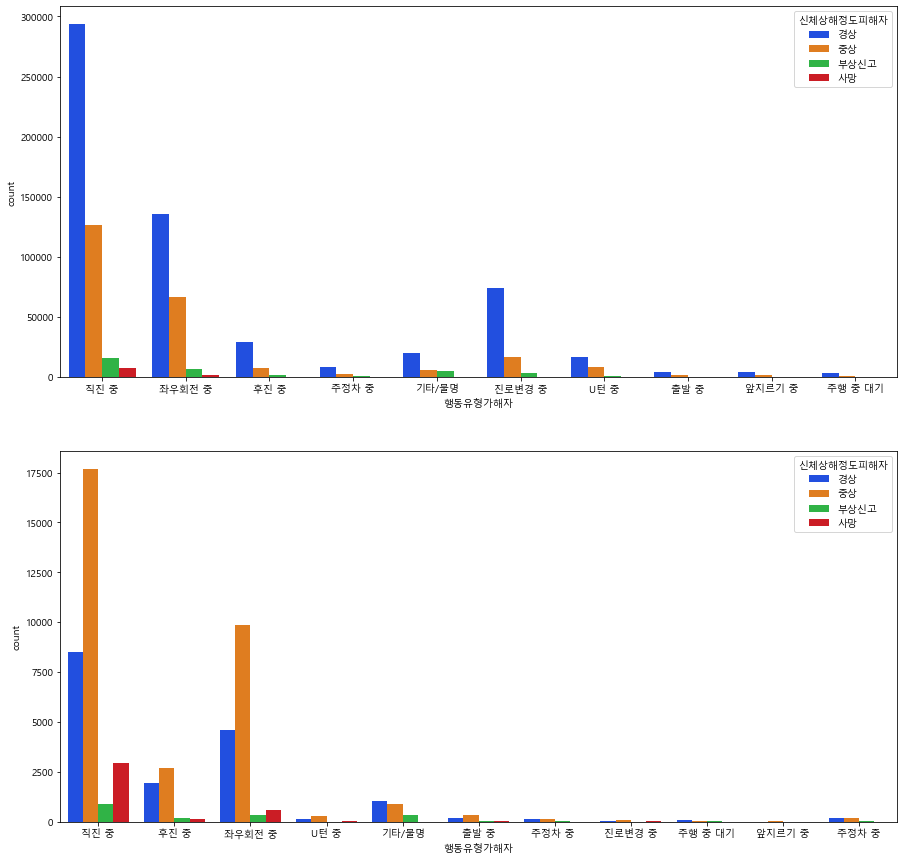

In [46]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="행동유형가해자",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="행동유형가해자", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 13. 가해자신체상해주부위

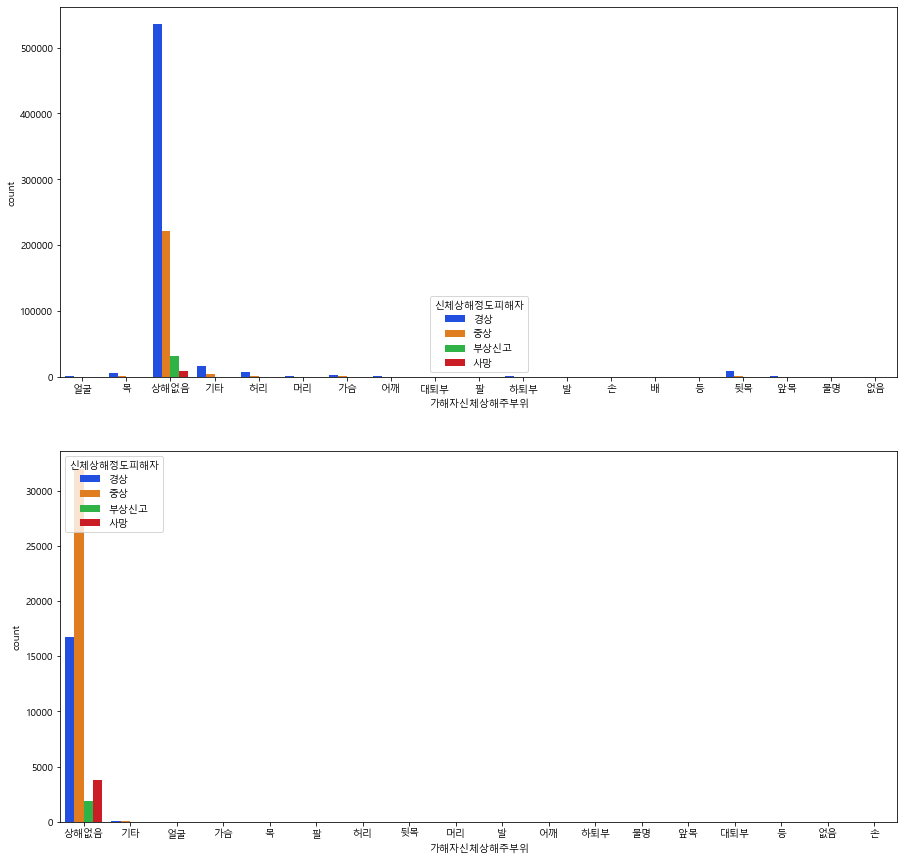

In [47]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="가해자신체상해주부위",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="가해자신체상해주부위", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 14. 피해자신체상해주부위

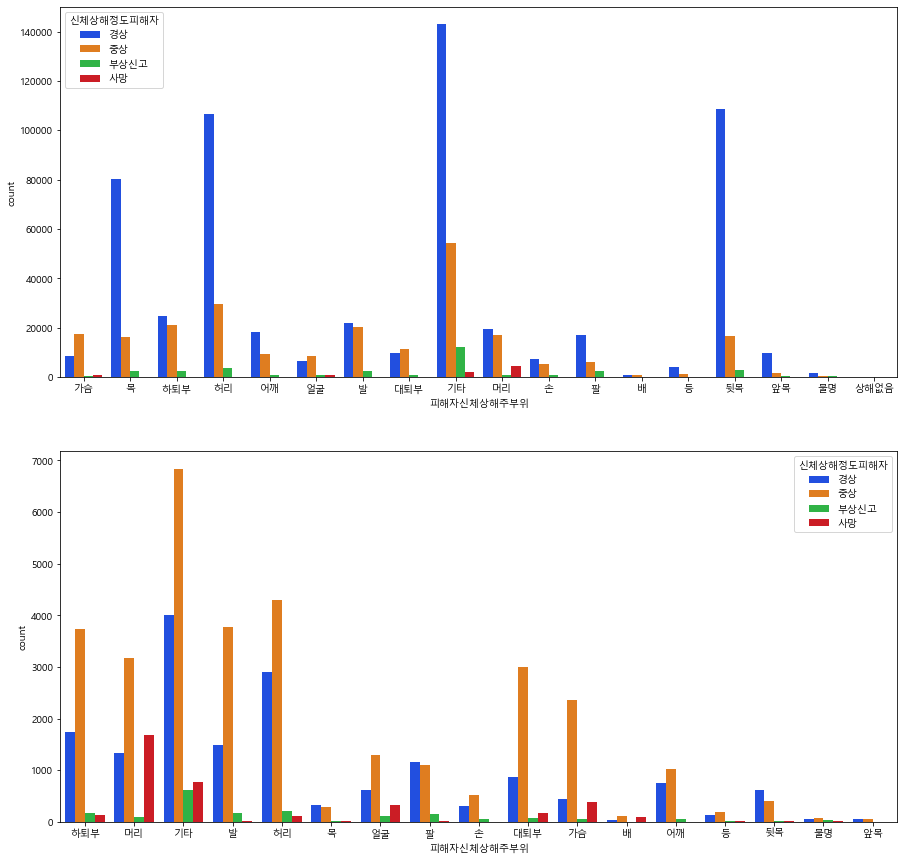

In [48]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="피해자신체상해주부위",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="피해자신체상해주부위", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 15. 당사자종별가해자_대분류

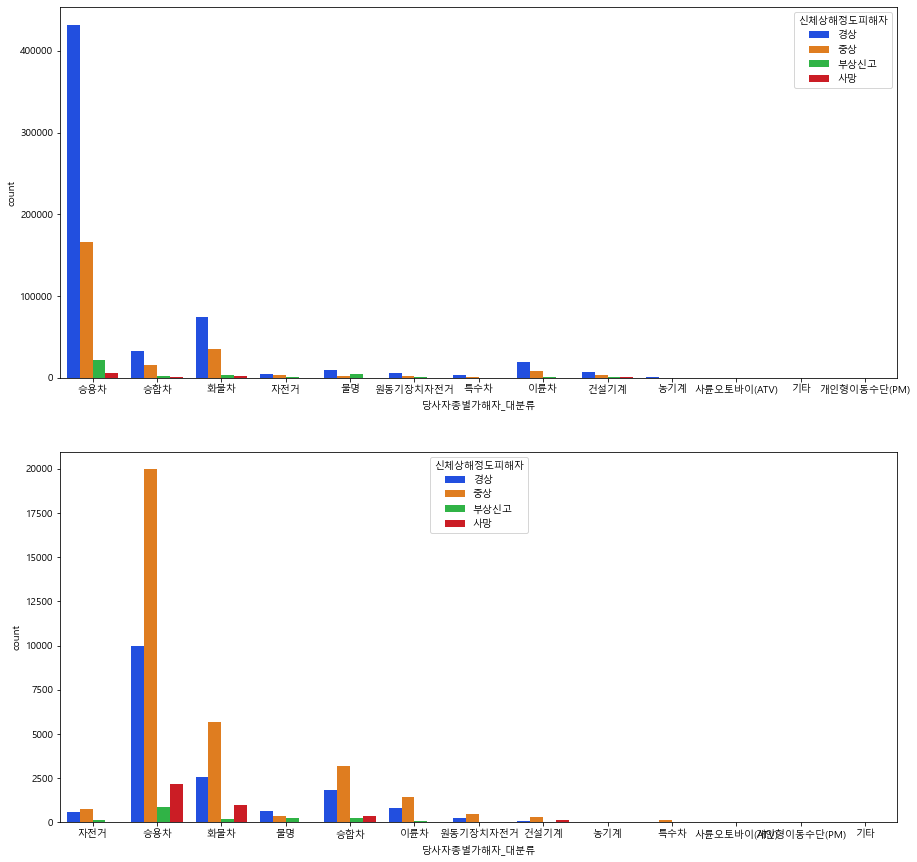

In [49]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="당사자종별가해자_대분류",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="당사자종별가해자_대분류", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 16. 당사자종별피해자_대분류

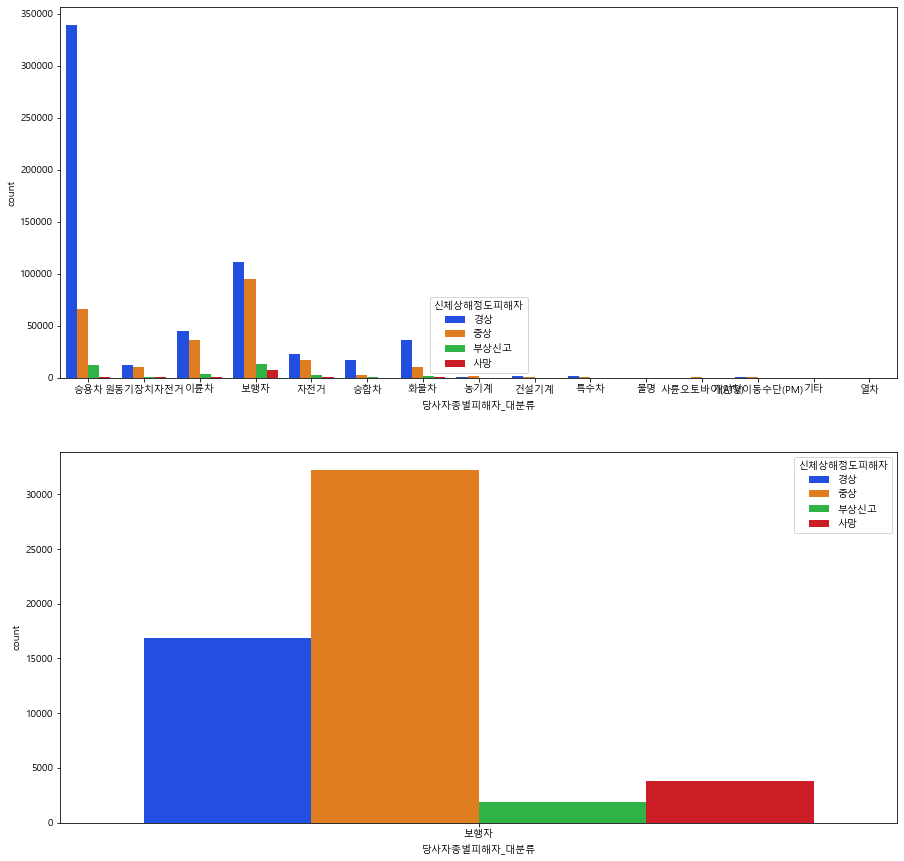

In [50]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="당사자종별피해자_대분류",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="당사자종별피해자_대분류", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 17. 도로종류

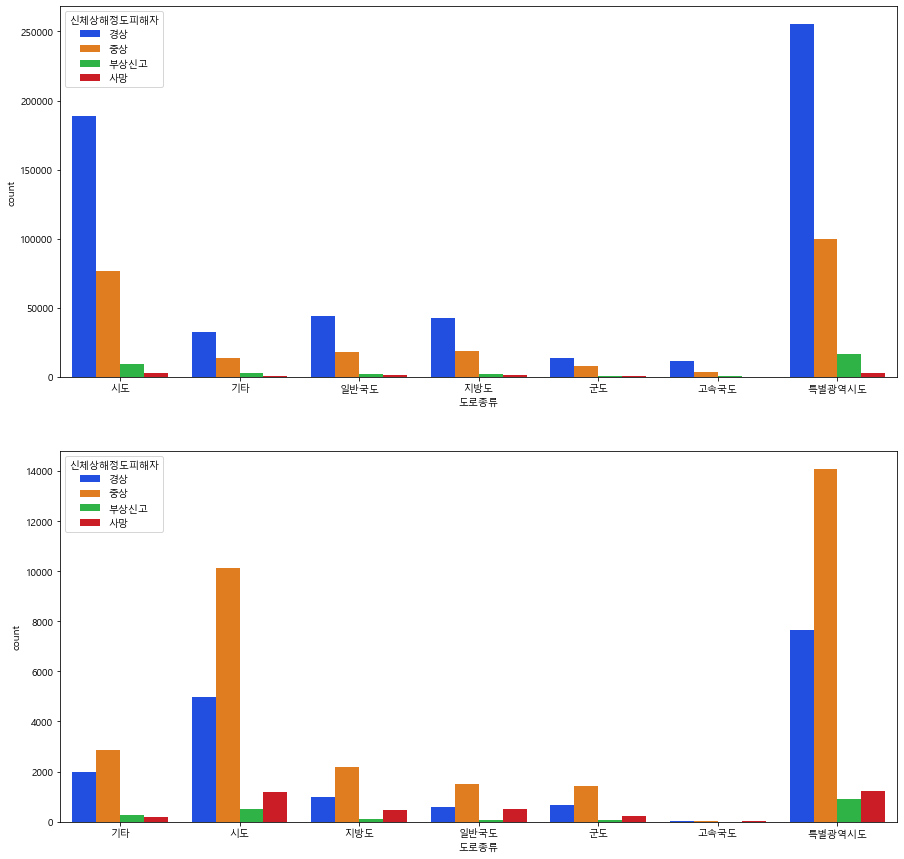

In [51]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="도로종류",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="도로종류", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 18. 도로형태_대분류

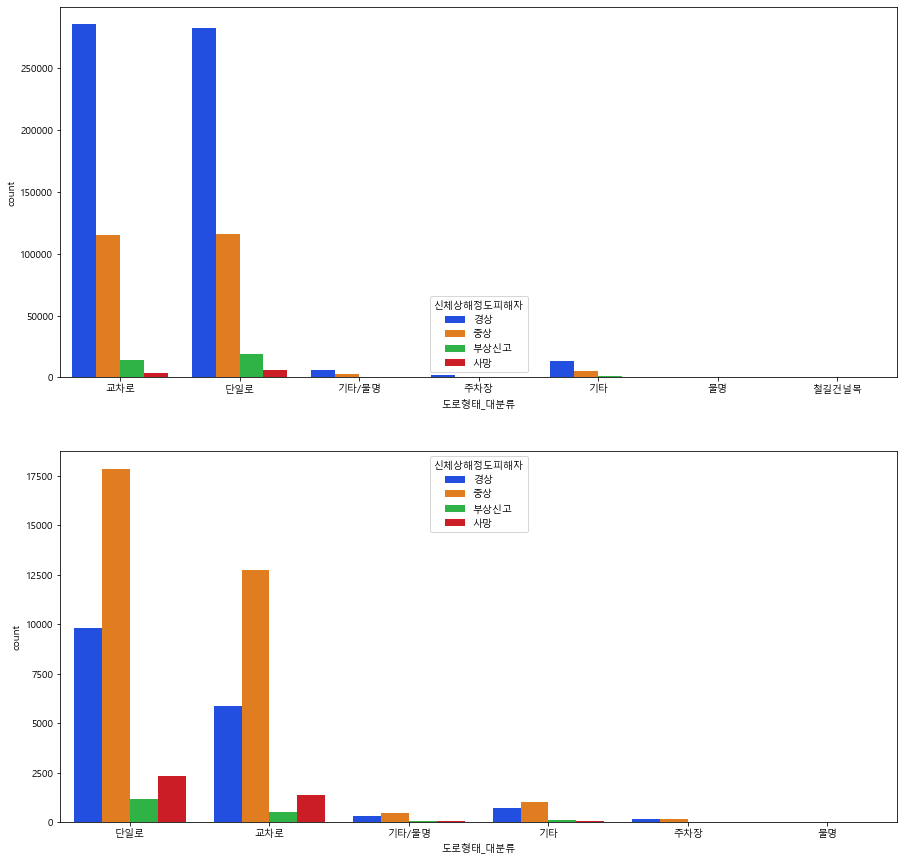

In [52]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="도로형태_대분류",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="도로형태_대분류", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 19. 노인보호구역_여부

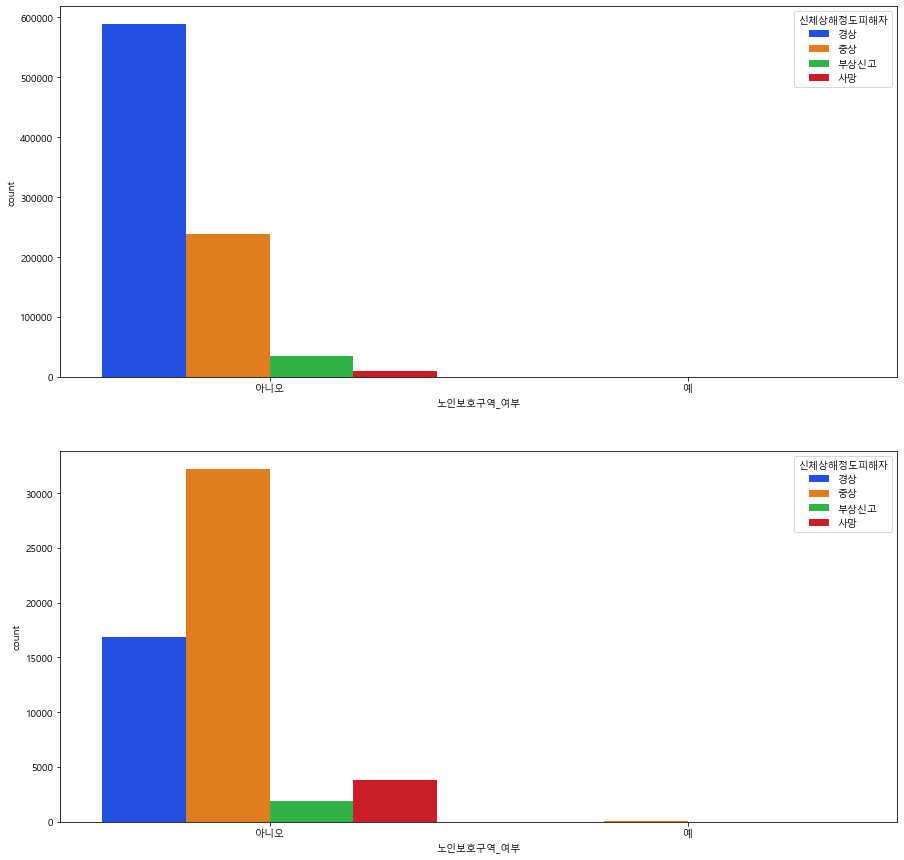

In [53]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="노인보호구역_여부",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="노인보호구역_여부", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 20.어린이보호구역_여부

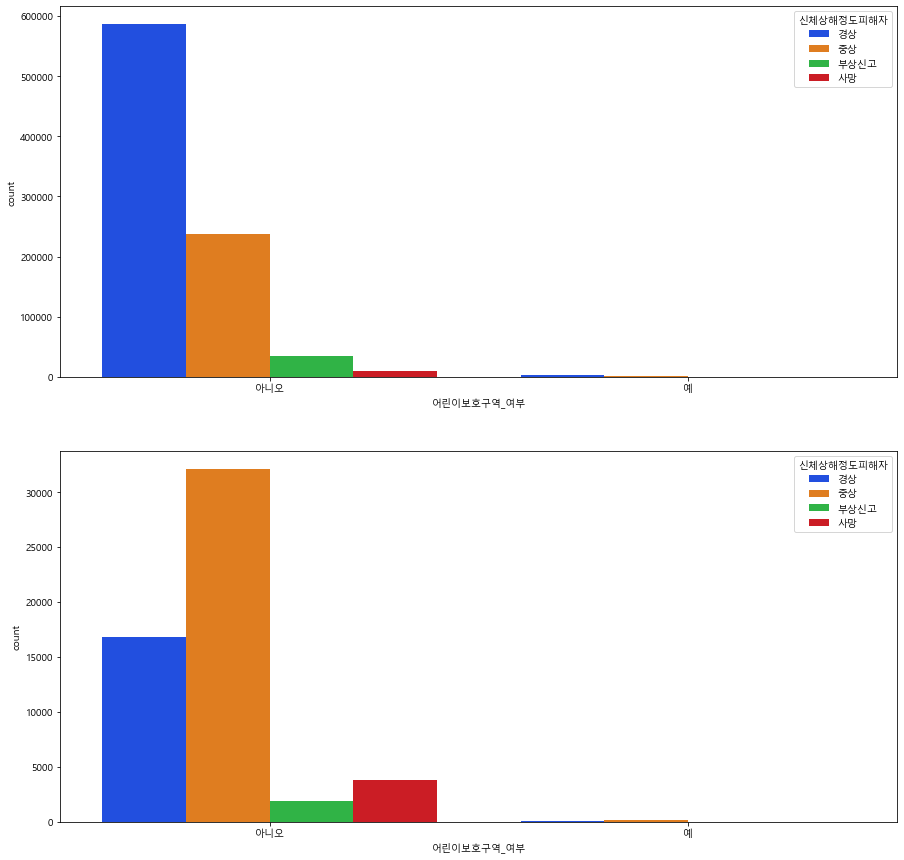

In [54]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="어린이보호구역_여부",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="어린이보호구역_여부", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 21. 자전거도로_여부

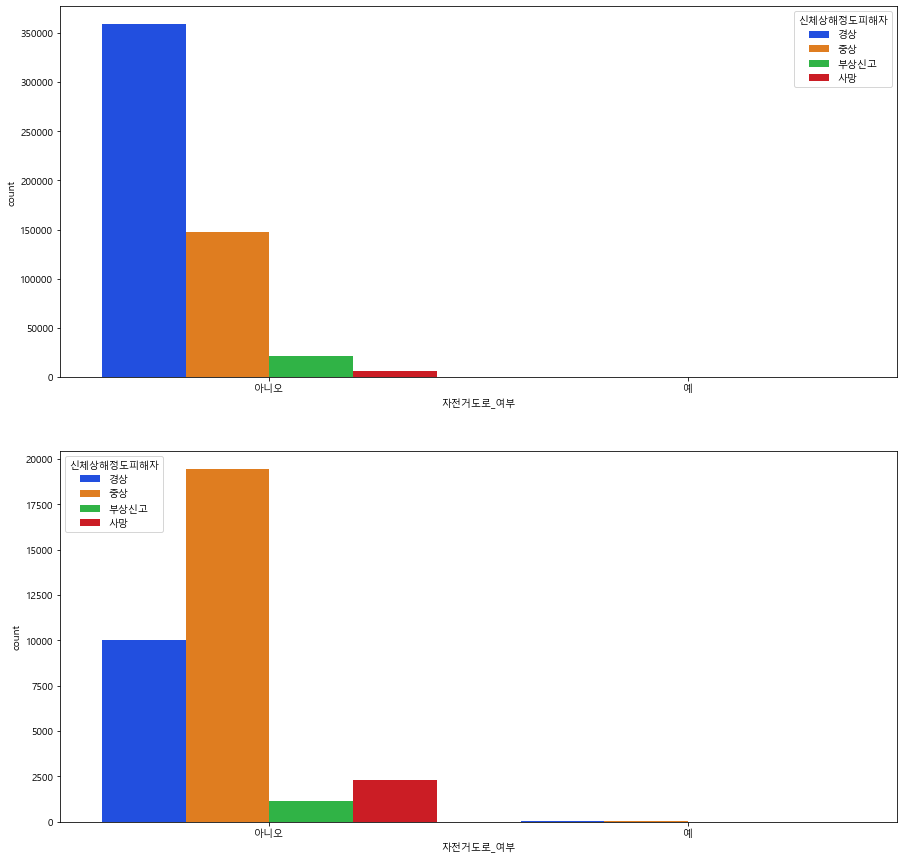

In [55]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="자전거도로_여부",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="자전거도로_여부", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 22. 도로선형

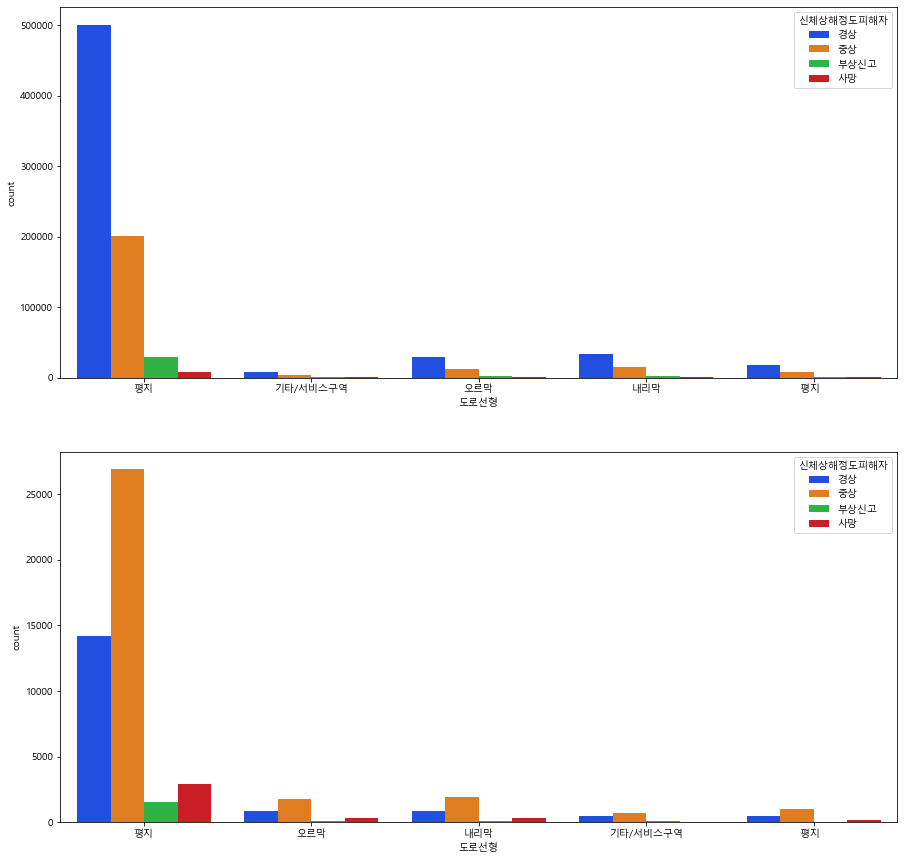

In [56]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="도로선형",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="도로선형", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 23. 기상상태

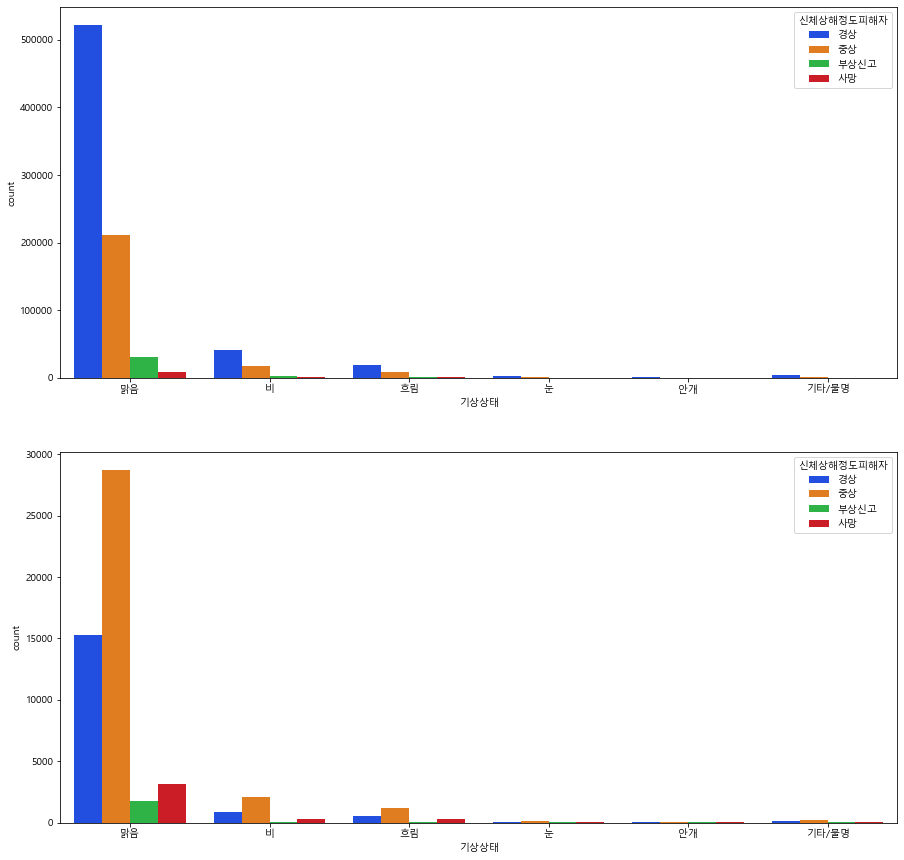

In [57]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="기상상태",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="기상상태", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 24. 노면상태_대분류

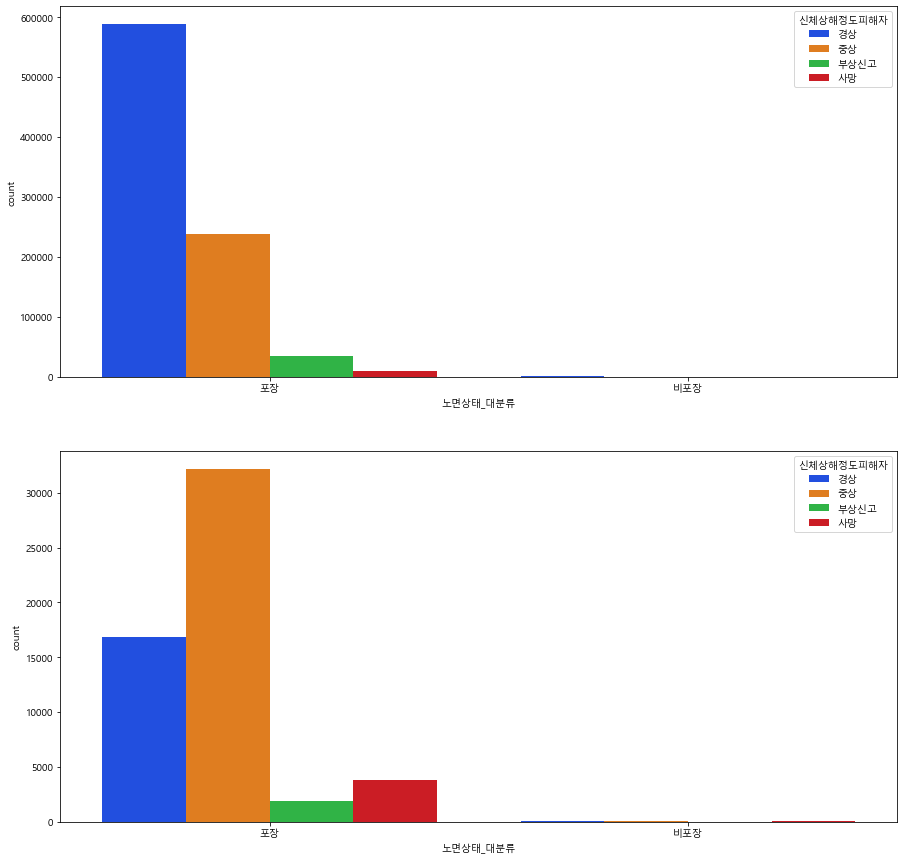

In [58]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="노면상태_대분류",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="노면상태_대분류", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 25. 노면상태

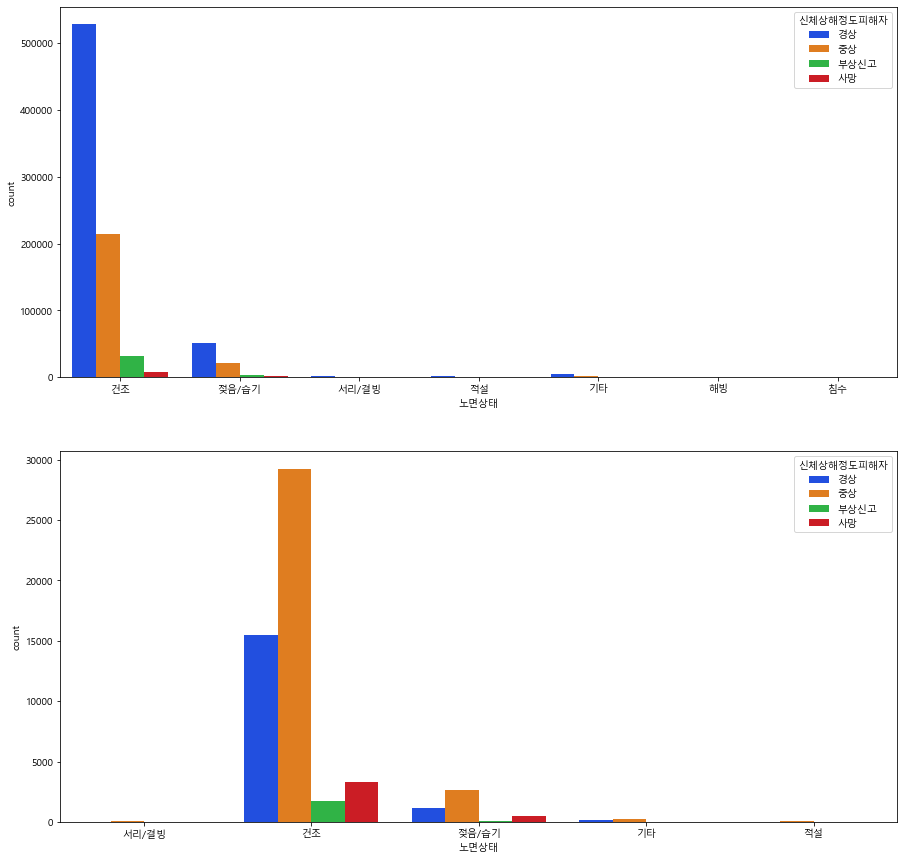

In [59]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="노면상태",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="노면상태", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 26. 교차로형태_대분류

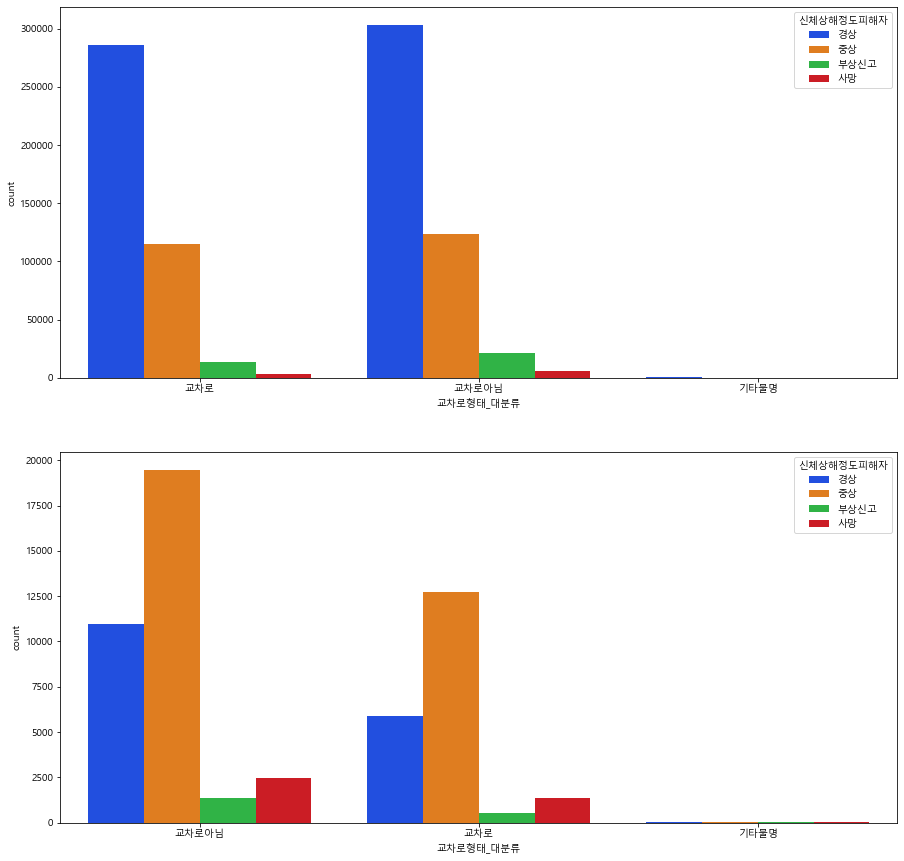

In [60]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="교차로형태_대분류",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="교차로형태_대분류", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()

# 27. 교차로형태

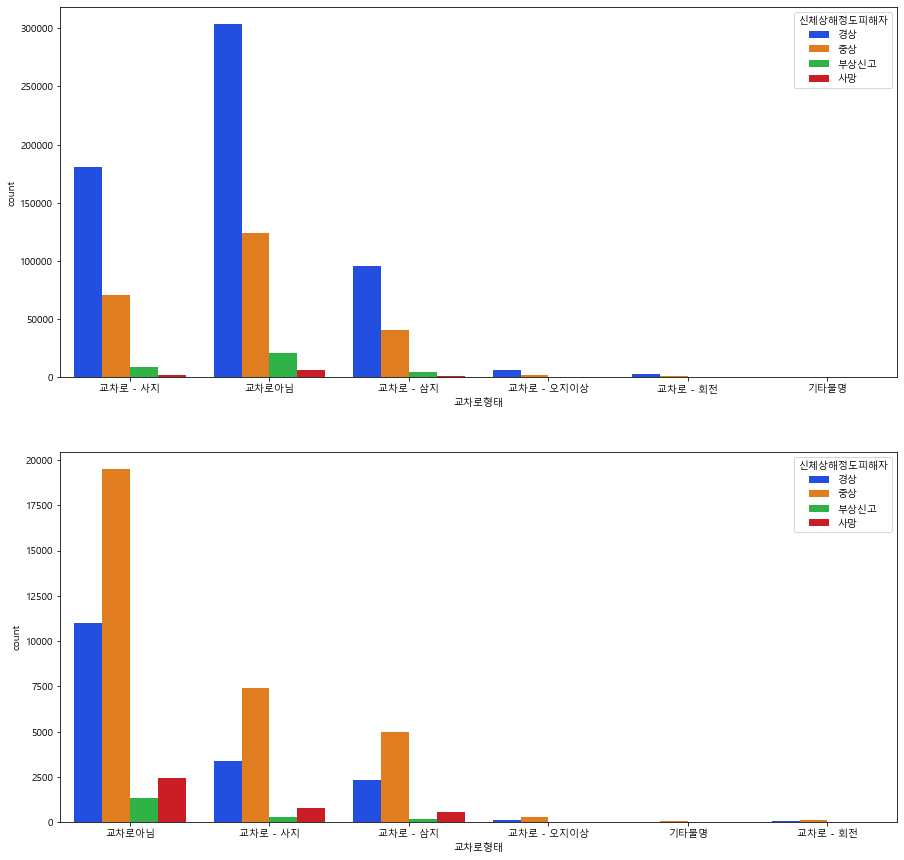

In [61]:
sns.set_palette("bright")
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,15))
g = sns.countplot( x="교차로형태",hue="신체상해정도피해자",data=df1, ax=ax1)
g= sns.countplot(x="교차로형태", hue="신체상해정도피해자", data=df2, ax=ax2)
plt.show()